In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_delay(h, t_end=6):
    t = np.arange(-3, t_end + h, h)
    N = len(t)

    x = np.zeros(N)
    dx = np.zeros(N)

    for i in range(len(t)):
        if t[i] <= 0:
            x[i] = t[i] + 3
            dx[i] = 1

    for i in range(len(t)):
        if t[i] > 0:
            t_i = t[i]
            t_delay = t_i - 3

            j = np.where(np.isclose(t, t_delay, atol=1e-10))[0]
            if len(j) == 0:
                x_delay = np.interp(t_delay, t, x)
                dx_delay = np.interp(t_delay, t, dx)
            else:
                x_delay = x[j[0]]
                dx_delay = dx[j[0]]

            dx[i] = 2 * dx_delay + 3 * x_delay + t_i
            x[i] = x[i - 1] + h * dx[i - 1]

    return t, x

In [3]:
def analytical_solution(t):
    x = np.zeros_like(t)
    for i, ti in enumerate(t):
        if ti < 0:
            x[i] = ti + 3
        elif 0 <= ti <= 3:
            x[i] = 2*ti + 2*ti**2 + 3
        elif 3 < ti <= 6:
            x[i] = 2*ti**3 - (21/2)*ti**2 + 25*ti - 7.5
    return x

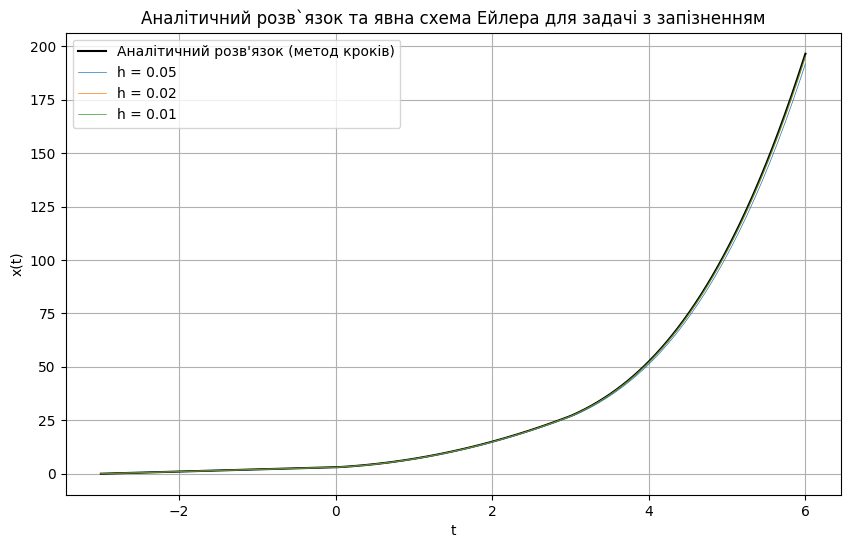

In [4]:
t_vals = np.linspace(-3, 6, 1000)
x_vals = analytical_solution(t_vals)
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x_vals, label="Аналітичний розв'язок (метод кроків)", color='black')

hs = [0.05, 0.02, 0.01]

for h in hs:
    t_vals, x_vals = euler_delay(h)
    plt.plot(t_vals, x_vals, label=f'h = {h}', linewidth=0.5)

plt.title("Аналітичний розв`язок та явна схема Ейлера для задачі з запізненням")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()